# Introdução ao pacote Yahoo Finance (<code>yfinance</code>)

In [77]:
# Importação de pacotes
import yfinance as yf
import pandas as pd
import datetime

In [78]:
import warnings
warnings.filterwarnings('ignore')

## Obtendo informações financeiras de ações

In [79]:
amazon = yf.Ticker("AMZN")
print(amazon.info)

{'zip': '98109-5210', 'sector': 'Consumer Cyclical', 'fullTimeEmployees': 1335000, 'longBusinessSummary': 'Amazon.com, Inc. engages in the retail sale of consumer products and subscriptions in North America and internationally. The company operates through three segments: North America, International, and Amazon Web Services (AWS). It sells merchandise and content purchased for resale from third-party sellers through physical and online stores. The company also manufactures and sells electronic devices, including Kindle, Fire tablets, Fire TVs, Rings, and Echo and other devices; provides Kindle Direct Publishing, an online service that allows independent authors and publishers to make their books available in the Kindle Store; and develops and produces media content. In addition, it offers programs that enable sellers to sell their products on its websites, as well as its stores; and programs that allow authors, musicians, filmmakers, skill and app developers, and others to publish and

O comando acima imprime um dicionario Python contendo inúmeras informações gerais e financeias da empresa analizada. 

Por exemplo:

1. Impressão do setor de atução da empresa:

In [80]:
print(amazon.info['sector'])

Consumer Cyclical


   2. Relação preço / lucro

In [81]:
print(amazon.info['trailingPE'])

57.89041


   3. Beta da empresa

In [82]:
print(amazon.info['beta'])

1.143625


## Obtendo os preços históricos de mercado

Podemos utilizar o pacote <code>yfinance</code> para efetuar o <em>download</em> dos <strong>dados históricos de mercado</strong>, como mostrado abaixo:

In [83]:
print(amazon.history(period="max"))

                   Open         High          Low        Close    Volume  \
Date                                                                       
1997-05-15     2.437500     2.500000     1.927083     1.958333  72156000   
1997-05-16     1.968750     1.979167     1.708333     1.729167  14700000   
1997-05-19     1.760417     1.770833     1.625000     1.708333   6106800   
1997-05-20     1.729167     1.750000     1.635417     1.635417   5467200   
1997-05-21     1.635417     1.645833     1.375000     1.427083  18853200   
...                 ...          ...          ...          ...       ...   
2021-08-20  3203.870117  3207.810059  3175.760010  3199.949951   3341200   
2021-08-23  3211.899902  3280.899902  3210.010010  3265.870117   3268100   
2021-08-24  3280.000000  3315.489990  3274.580078  3305.780029   2551800   
2021-08-25  3309.870117  3321.000000  3286.149902  3299.179932   1672300   
2021-08-26  3299.000000  3332.000000  3296.000000  3322.620117   1394136   

           

Note-se que quando especificamos o argumento <code>period="max"</code>, obtemos dados diários. Outras opções válodas são:

   * <code>"1d"</code>: diário
   * <code>"5d"</code>: a cada 5 dias
   * <code>"1m"</code>: mensal
   * <code>"3m"</code>: trimestral
   * <code>"6m"</code>: semestral
   * <code>"1y"</code>: anual
   * <code>"2y"</code>: bienal
   * <code>"5y"</code>: quinquenal
   * <code>"10y"</code>: decenal

Também podemos especificar as datas de início e fim dos dados que desejamos analizar. Para isso, necessitamos do pacote <code>datetime</code>, como mostrado abaixo:

In [84]:
start = datetime.datetime(2012, 5, 31)
end = datetime.datetime(2013, 1, 30)

amazon = yf.Ticker("AMZN")
print(amazon.history(start = start, end = end))

                  Open        High         Low       Close    Volume  \
Date                                                                   
2012-05-31  209.479996  213.789993  207.110001  212.910004   4944000   
2012-06-01  208.440002  211.229996  207.300003  208.220001   3951500   
2012-06-04  207.399994  215.350006  206.369995  214.570007   4299600   
2012-06-05  213.850006  216.860001  211.160004  213.210007   3543900   
2012-06-06  214.630005  218.399994  214.520004  217.639999   2710100   
...                ...         ...         ...         ...       ...   
2013-01-23  270.570007  271.089996  266.649994  268.109985   2508900   
2013-01-24  269.369995  276.649994  269.369995  273.459991   3417000   
2013-01-25  275.000000  284.720001  274.399994  283.989990   4968100   
2013-01-28  283.779999  284.480011  274.399994  276.040009   4321400   
2013-01-29  275.350006  275.459991  258.350006  260.350006  10172600   

            Dividends  Stock Splits  
Date                     

Além disso, também podemos baixar os preços históricos de mais de uma empresa simultaneamente:

In [85]:
df = yf.download("AMZN MSFT", start = "2019-01-01", end = "2020-01-01", group_by= "ticker")

[*********************100%***********************]  2 of 2 completed


In [86]:
print(df)

                   AMZN                                                      \
                   Open         High          Low        Close    Adj Close   
Date                                                                          
2019-01-02  1465.199951  1553.359985  1460.930054  1539.130005  1539.130005   
2019-01-03  1520.010010  1538.000000  1497.109985  1500.280029  1500.280029   
2019-01-04  1530.000000  1594.000000  1518.310059  1575.390015  1575.390015   
2019-01-07  1602.310059  1634.560059  1589.189941  1629.510010  1629.510010   
2019-01-08  1664.689941  1676.609985  1616.609985  1656.579956  1656.579956   
...                 ...          ...          ...          ...          ...   
2019-12-24  1793.810059  1795.569946  1787.579956  1789.209961  1789.209961   
2019-12-26  1801.010010  1870.459961  1799.500000  1868.770020  1868.770020   
2019-12-27  1882.920044  1901.400024  1866.010010  1869.800049  1869.800049   
2019-12-30  1874.000000  1884.000000  1840.619995  1

In [87]:
print(df.AMZN)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-02  1465.199951  1553.359985  1460.930054  1539.130005  1539.130005   
2019-01-03  1520.010010  1538.000000  1497.109985  1500.280029  1500.280029   
2019-01-04  1530.000000  1594.000000  1518.310059  1575.390015  1575.390015   
2019-01-07  1602.310059  1634.560059  1589.189941  1629.510010  1629.510010   
2019-01-08  1664.689941  1676.609985  1616.609985  1656.579956  1656.579956   
...                 ...          ...          ...          ...          ...   
2019-12-24  1793.810059  1795.569946  1787.579956  1789.209961  1789.209961   
2019-12-26  1801.010010  1870.459961  1799.500000  1868.770020  1868.770020   
2019-12-27  1882.920044  1901.400024  1866.010010  1869.800049  1869.800049   
2019-12-30  1874.000000  1884.000000  1840.619995  1846.890015  1846.890015   
2019-12-31  1842.000000  1853.260010  1832.229980  1

# Obterndo cotações de ações usando o pacote <code>pandas_datareader</code>

In [88]:
# importação dos pacotes
from pandas_datareader import data as web
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
cotacao_bovespa = web.DataReader('^BVSP', data_source="yahoo", start="01/01/2020", end="01/01/2021")
display(cotacao_bovespa)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,118573.0,115649.0,115652.0,118573.0,5162700.0,118573.0
2020-01-03,118792.0,117341.0,118564.0,117707.0,6834500.0,117707.0
2020-01-06,117707.0,116269.0,117707.0,116878.0,6570000.0,116878.0
2020-01-07,117076.0,115965.0,116872.0,116662.0,4854100.0,116662.0
2020-01-08,117335.0,115693.0,116667.0,116247.0,5910500.0,116247.0
...,...,...,...,...,...,...
2020-12-22,116903.0,115648.0,115825.0,116348.0,6947900.0,116348.0
2020-12-23,118311.0,116636.0,116636.0,117857.0,6483300.0,117857.0
2020-12-28,119213.0,117805.0,117806.0,119051.0,7171700.0,119051.0


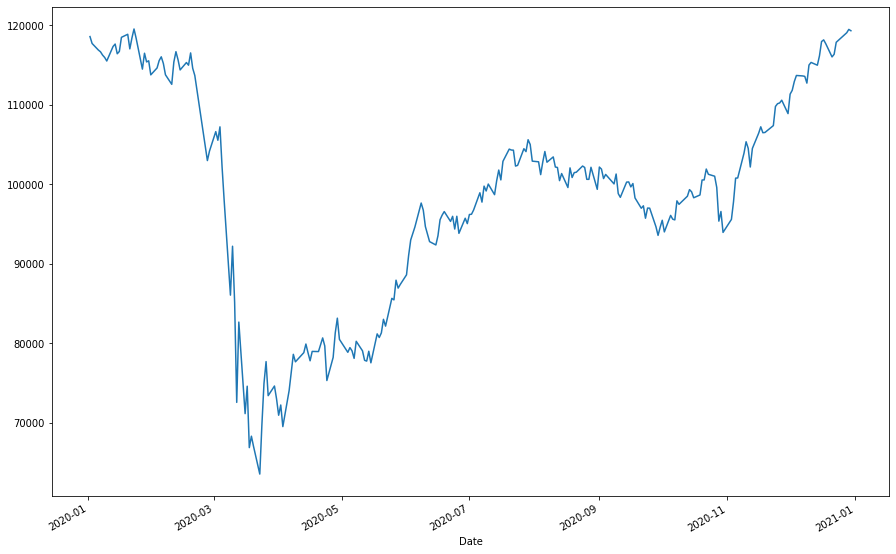

In [90]:
cotacao_bovespa['Adj Close'].plot(figsize=(15,10))
plt.show()

In [91]:
petrobras = web.DataReader('PETR4.SA', data_source="yahoo", start="01/01/2020", end="01/01/2021")
petrobras.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,30.700001,30.309999,30.510000,30.700001,37774500.0,28.028814
2020-01-03,31.240000,30.450001,30.879999,30.450001,71595600.0,27.800568
2020-01-06,30.940001,29.950001,30.430000,30.809999,81844000.0,28.129244
2020-01-07,30.879999,30.469999,30.820000,30.690001,32822000.0,28.019684
2020-01-08,30.770000,30.240000,30.690001,30.500000,48215600.0,27.846214


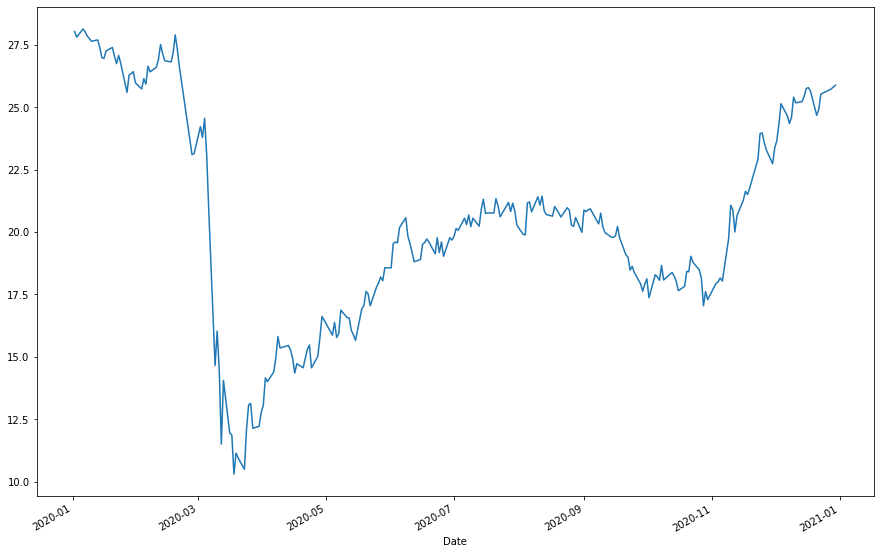

In [92]:
petrobras['Adj Close'].plot(figsize=(15,10))
plt.show()

## Obtendo cotações de várias empresas

ITUB4


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,38.029999,36.990002,37.279999,38.029999,20666100.0,36.336163
2020-01-03,38.240002,37.450001,37.500000,37.630001,24891400.0,35.953979
2020-01-06,37.580002,36.910000,37.549999,37.070000,22294700.0,35.418922
2020-01-07,37.240002,36.209999,37.070000,36.209999,20000900.0,34.597225
2020-01-08,36.810001,35.619999,36.450001,35.619999,25980900.0,34.033497
...,...,...,...,...,...,...
2020-12-22,31.650000,31.150000,31.170000,31.250000,19659000.0,30.615192
2020-12-23,32.049999,31.270000,31.320000,31.940001,19959200.0,31.291178
2020-12-28,32.430000,32.009998,32.220001,32.169998,15444600.0,31.516506


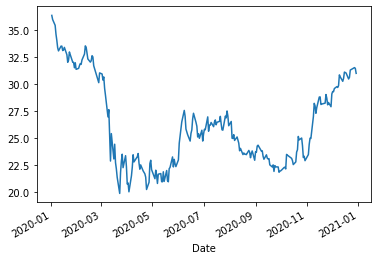

PETR4


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,30.700001,30.309999,30.510000,30.700001,37774500.0,28.028814
2020-01-03,31.240000,30.450001,30.879999,30.450001,71595600.0,27.800568
2020-01-06,30.940001,29.950001,30.430000,30.809999,81844000.0,28.129244
2020-01-07,30.879999,30.469999,30.820000,30.690001,32822000.0,28.019684
2020-01-08,30.770000,30.240000,30.690001,30.500000,48215600.0,27.846214
...,...,...,...,...,...,...
2020-12-22,27.469999,27.049999,27.200001,27.280001,46513200.0,24.908234
2020-12-23,28.250000,27.350000,27.430000,27.950001,49038900.0,25.519983
2020-12-28,28.520000,28.180000,28.360001,28.180000,36313300.0,25.729984


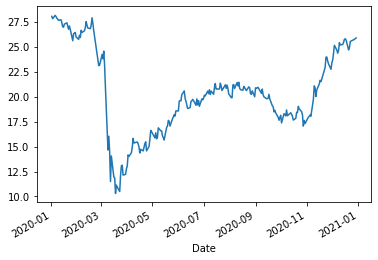

BBDC4


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,34.099998,32.909088,33.209091,34.099998,20687260.0,32.271488
2020-01-03,34.545452,33.527271,33.545452,34.099998,33057090.0,32.286343
2020-01-06,33.890907,33.127274,33.818180,33.490910,27830990.0,31.709637
2020-01-07,33.599998,32.727272,33.409088,32.909088,16343030.0,31.158756
2020-01-08,33.200001,32.236362,33.063637,32.400002,23393480.0,30.676748
...,...,...,...,...,...,...
2020-12-22,24.772726,24.327272,24.327272,24.636362,35024660.0,23.584578
2020-12-23,25.363636,24.690908,24.836363,25.200001,28985220.0,24.124157
2020-12-28,25.690908,25.381819,25.545454,25.445454,41313580.0,24.359127


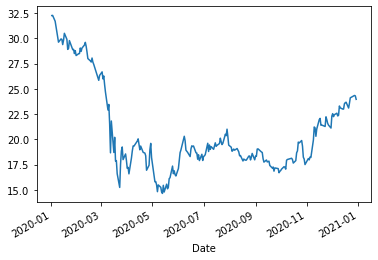

VALE3


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,54.439999,53.750000,53.980000,54.330002,17509700.0,48.935547
2020-01-03,54.500000,53.580002,53.680000,53.930000,17284800.0,48.575260
2020-01-06,53.799999,53.150002,53.799999,53.610001,32787800.0,48.287033
2020-01-07,54.189999,53.400002,53.500000,54.000000,16326400.0,48.638309
2020-01-08,54.369999,53.619999,54.200001,54.009998,15298500.0,48.647316
...,...,...,...,...,...,...
2020-12-22,86.989998,85.430000,86.860001,86.940002,23157000.0,81.581139
2020-12-23,87.529999,86.400002,86.529999,87.360001,17710200.0,81.975250
2020-12-28,88.580002,87.080002,87.790001,87.309998,26001300.0,81.928322


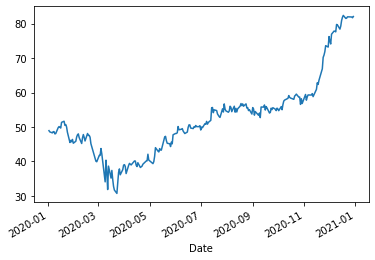

In [93]:
empresas = ['ITUB4', 'PETR4', 'BBDC4', 'VALE3']
for empresa in empresas:
    print(empresa)
    cotacao = web.DataReader(f'{empresa}.SA', data_source="yahoo", start="01/01/2020", end="01/01/2021")
    display(cotacao)
    cotacao['Adj Close'].plot()
    plt.show()

# Análise Magazine Luiza S.A.

In [94]:
magalu = web.DataReader('MGLU3.SA', data_source="yahoo", start="01/01/2016", end="01/01/2021")
magalu.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,0.071484,0.064921,0.066210,0.070117,138547200.0,0.066922
2016-01-05,0.072578,0.070117,0.071523,0.070820,96179200.0,0.067593
2016-01-06,0.071484,0.064687,0.070820,0.064687,117324800.0,0.061740
2016-01-07,0.062500,0.051171,0.062500,0.056093,226688000.0,0.053537
2016-01-08,0.059570,0.055664,0.058593,0.056328,97638400.0,0.053762


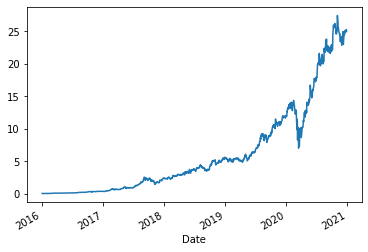

In [95]:
magalu['Adj Close'].plot()
plt.show()

In [96]:
magalu2020 = magalu['2020-01-01':'2020-12-31']
magalu2020

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,12.332500,11.927500,12.075000,12.332500,29600800.0,12.029736
2020-01-03,12.332500,12.075000,12.125000,12.222500,26737600.0,11.922435
2020-01-06,12.327500,11.950000,12.100000,12.232500,27359200.0,11.932189
2020-01-07,12.300000,12.125000,12.235000,12.197500,26818800.0,11.898048
2020-01-08,12.587500,12.125000,12.155000,12.572500,40007200.0,12.263844
...,...,...,...,...,...,...
2020-12-22,25.420000,24.850000,25.290001,25.160000,25236200.0,25.115610
2020-12-23,25.629999,24.969999,25.250000,24.969999,20558600.0,24.925945
2020-12-28,25.330000,24.400000,24.780001,25.250000,23099100.0,25.205452


In [97]:
magalu2020.describe()

,High,Low,Open,Close,Volume,Adj Close
count,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000
mean,18.472136,17.663036,18.071609,18.078198,5.163457e+07,17.940905
std,5.388282,5.335807,5.365932,5.359830,2.252985e+07,5.439155
min,7.842500,6.250000,6.875000,7.202500,1.778970e+07,7.025677
25%,13.955000,13.387500,13.575000,13.643750,3.551050e+07,13.417311
50%,18.225000,17.605000,17.975000,17.997499,4.534240e+07,17.861677
75%,23.050000,22.263750,22.803750,22.728749,6.123380e+07,22.688648
max,28.309999,26.740000,28.150000,27.450001,1.279260e+08,27.401571


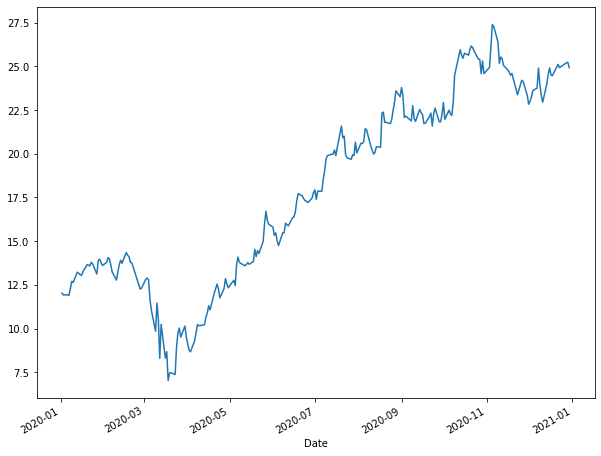

In [98]:
plt.figure(figsize=(10,8))
magalu2020['Adj Close'].plot()
plt.show()

### Cálculo dos retornos para o ano de 2020

In [99]:
magalu2020['PriceDiff'] = magalu2020['Adj Close'].shift(-1) - magalu2020['Adj Close']
magalu2020['Returns'] = 100 * magalu2020['PriceDiff'] / magalu2020['Adj Close']
magalu2020['Direction'] = [1 if magalu2020['PriceDiff'].loc[ei] > 0 else 0 for ei in magalu2020.index]
magalu2020.head()

,High,Low,Open,Close,Volume,Adj Close,PriceDiff,Returns,Direction
Date,,,,,,,,,
2020-01-02,12.3325,11.9275,12.075,12.3325,29600800.0,12.029736,-0.107301,-0.891963,0
2020-01-03,12.3325,12.0750,12.125,12.2225,26737600.0,11.922435,0.009754,0.081814,1
2020-01-06,12.3275,11.9500,12.100,12.2325,27359200.0,11.932189,-0.034141,-0.286122,0
2020-01-07,12.3000,12.1250,12.235,12.1975,26818800.0,11.898048,0.365795,3.074413,1
2020-01-08,12.5875,12.1250,12.155,12.5725,40007200.0,12.263844,0.436513,3.559349,1


In [100]:
magalu2020.tail()

,High,Low,Open,Close,Volume,Adj Close,PriceDiff,Returns,Direction
Date,,,,,,,,,
2020-12-22,25.420000,24.850000,25.290001,25.160000,25236200.0,25.115610,-0.189665,-0.755167,0
2020-12-23,25.629999,24.969999,25.250000,24.969999,20558600.0,24.925945,0.279507,1.121348,1
2020-12-28,25.330000,24.400000,24.780001,25.250000,23099100.0,25.205452,0.029947,0.118813,1
2020-12-29,25.559999,25.020000,25.230000,25.280001,17789700.0,25.235399,-0.303478,-1.202589,0
2020-12-30,25.660000,24.950001,25.370001,24.950001,19188700.0,24.931921,NaN,NaN,0


### Média móvel

Criando colunas para média móvel de 10 dias e de 50 dias

In [103]:
magalu2020['ma10'] = magalu2020['Adj Close'].rolling(10).mean()
magalu2020['ma50'] = magalu2020['Adj Close'].rolling(50).mean()
magalu2020.tail()

,High,Low,Open,Close,Volume,Adj Close,PriceDiff,Returns,Direction,ma10,ma50
Date,,,,,,,,,,,
2020-12-22,25.420000,24.850000,25.290001,25.160000,25236200.0,25.115610,-0.189665,-0.755167,0,24.278090,24.823676
2020-12-23,25.629999,24.969999,25.250000,24.969999,20558600.0,24.925945,0.279507,1.121348,1,24.376916,24.832311
2020-12-28,25.330000,24.400000,24.780001,25.250000,23099100.0,25.205452,0.029947,0.118813,1,24.561589,24.817337
2020-12-29,25.559999,25.020000,25.230000,25.280001,17789700.0,25.235399,-0.303478,-1.202589,0,24.790186,24.809351
2020-12-30,25.660000,24.950001,25.370001,24.950001,19188700.0,24.931921,NaN,NaN,0,24.882621,24.798690


Os gráficos do preço de fechamento ajustado e das médias móveis de 10 e de 50 dias são mostrados abaixo:

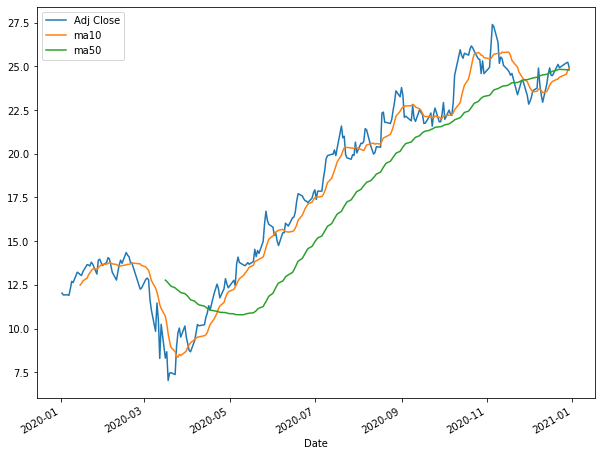

In [104]:
plt.figure(figsize=(10,8))
magalu2020['Adj Close'].plot()
magalu2020['ma10'].plot()
magalu2020['ma50'].plot()
plt.legend()
plt.show()

Observando o gráfico acima, notamos que sempre que a média móvel de 10 dias é superior à média móvel de 50 dias, o preço da ação está em crescimento. Caso contrário, a ação estará em queda. Com base nesse fato, podemos determinar uma estratégia básica de compra e venda de ações.

Vamos adicionar uma nova coluna, denominada <strong>Shares</strong>, que compara as duas médias móveis a fim de deteminar períodos de crescimento e de queda do valor da ação:

In [106]:
magalu2020['Shares'] = [1 if magalu2020.loc[ei, 'ma10'] > magalu2020.loc[ei, 'ma50'] else 0 for ei in magalu2020.index]

In [107]:
magalu2020.head()

,High,Low,Open,Close,Volume,Adj Close,PriceDiff,Returns,Direction,ma10,ma50,Shares
Date,,,,,,,,,,,,
2020-01-02,12.3325,11.9275,12.075,12.3325,29600800.0,12.029736,-0.107301,-0.891963,0,NaN,NaN,0
2020-01-03,12.3325,12.0750,12.125,12.2225,26737600.0,11.922435,0.009754,0.081814,1,NaN,NaN,0
2020-01-06,12.3275,11.9500,12.100,12.2325,27359200.0,11.932189,-0.034141,-0.286122,0,NaN,NaN,0
2020-01-07,12.3000,12.1250,12.235,12.1975,26818800.0,11.898048,0.365795,3.074413,1,NaN,NaN,0
2020-01-08,12.5875,12.1250,12.155,12.5725,40007200.0,12.263844,0.436513,3.559349,1,NaN,NaN,0


In [108]:
magalu2020.tail()

,High,Low,Open,Close,Volume,Adj Close,PriceDiff,Returns,Direction,ma10,ma50,Shares
Date,,,,,,,,,,,,
2020-12-22,25.420000,24.850000,25.290001,25.160000,25236200.0,25.115610,-0.189665,-0.755167,0,24.278090,24.823676,0
2020-12-23,25.629999,24.969999,25.250000,24.969999,20558600.0,24.925945,0.279507,1.121348,1,24.376916,24.832311,0
2020-12-28,25.330000,24.400000,24.780001,25.250000,23099100.0,25.205452,0.029947,0.118813,1,24.561589,24.817337,0
2020-12-29,25.559999,25.020000,25.230000,25.280001,17789700.0,25.235399,-0.303478,-1.202589,0,24.790186,24.809351,0
2020-12-30,25.660000,24.950001,25.370001,24.950001,19188700.0,24.931921,NaN,NaN,0,24.882621,24.798690,1


Vamos adicionar uma coluna <strong>Profit</strong> usando uma <em>List Comprehension</em>.

In [111]:
magalu2020['Adj Close 1'] = magalu2020['Adj Close'].shift(-1)
magalu2020['Profit'] = [magalu2020.loc[ei, 'Adj Close 1'] - magalu2020.loc[ei, 'Adj Close'] if magalu2020.loc[ei, 'Shares'] == 1 else 0 for ei in magalu2020.index]
display(magalu2020)

,High,Low,Open,Close,Volume,Adj Close,PriceDiff,Returns,Direction,ma10,ma50,Shares,Adj Close 1,Profit
Date,,,,,,,,,,,,,,
2020-01-02,12.332500,11.927500,12.075000,12.332500,29600800.0,12.029736,-0.107301,-0.891963,0,NaN,NaN,0,11.922435,0.0
2020-01-03,12.332500,12.075000,12.125000,12.222500,26737600.0,11.922435,0.009754,0.081814,1,NaN,NaN,0,11.932189,0.0
2020-01-06,12.327500,11.950000,12.100000,12.232500,27359200.0,11.932189,-0.034141,-0.286122,0,NaN,NaN,0,11.898048,0.0
2020-01-07,12.300000,12.125000,12.235000,12.197500,26818800.0,11.898048,0.365795,3.074413,1,NaN,NaN,0,12.263844,0.0
2020-01-08,12.587500,12.125000,12.155000,12.572500,40007200.0,12.263844,0.436513,3.559349,1,NaN,NaN,0,12.700356,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,25.420000,24.850000,25.290001,25.160000,25236200.0,25.115610,-0.189665,-0.755167,0,24.278090,24.823676,0,24.925945,0.0
2020-12-23,25.629999,24.969999,25.250000,24.969999,20558600.0,24.925945,0.279507,1.121348,1,24.376916,24.832311,0,25.205452,0.0
2020-12-28,25.330000,24.400000,24.780001,25.250000,23099100.0,25.205452,0.029947,0.118813,1,24.561589,24.817337,0,25.235399,0.0


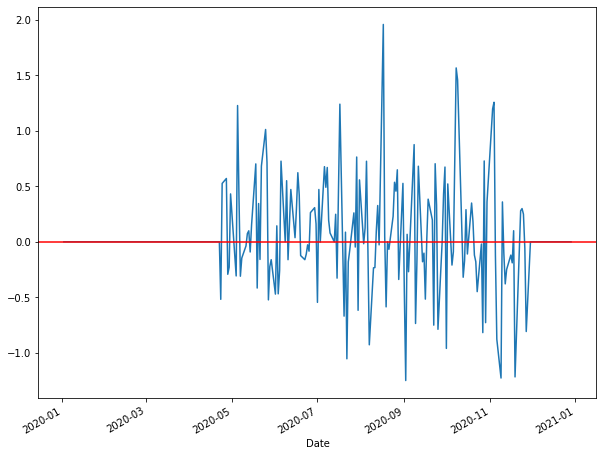

In [112]:
plt.figure(figsize=(10,8))
magalu2020['Profit'].plot()
plt.axhline(y = 0, color='red')
plt.show()

Finalmente, determinaremos o lucro acumulado com a estratégia definida acima:

In [113]:
magalu2020['wealth'] = magalu2020['Profit'].cumsum()
magalu2020.tail()

,High,Low,Open,Close,Volume,Adj Close,PriceDiff,Returns,Direction,ma10,ma50,Shares,Adj Close 1,Profit,wealth
Date,,,,,,,,,,,,,,,
2020-12-22,25.420000,24.850000,25.290001,25.160000,25236200.0,25.115610,-0.189665,-0.755167,0,24.278090,24.823676,0,24.925945,0.0,11.064583
2020-12-23,25.629999,24.969999,25.250000,24.969999,20558600.0,24.925945,0.279507,1.121348,1,24.376916,24.832311,0,25.205452,0.0,11.064583
2020-12-28,25.330000,24.400000,24.780001,25.250000,23099100.0,25.205452,0.029947,0.118813,1,24.561589,24.817337,0,25.235399,0.0,11.064583
2020-12-29,25.559999,25.020000,25.230000,25.280001,17789700.0,25.235399,-0.303478,-1.202589,0,24.790186,24.809351,0,24.931921,0.0,11.064583
2020-12-30,25.660000,24.950001,25.370001,24.950001,19188700.0,24.931921,NaN,NaN,0,24.882621,24.798690,1,NaN,NaN,NaN


Text(0.5, 1.0, 'Total money you win is 11.064582824707031')

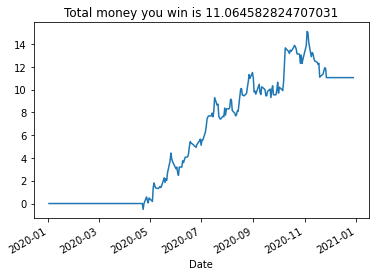

In [114]:
#plot the wealth to show the growth of profit over the period

magalu2020['wealth'].plot()
plt.title('Total money you win is {}'.format(magalu2020.loc[magalu2020.index[-2], 'wealth']))